## Write FeynmanDiagram

Convenient saving and loading of style independent feynman diagrams as XML or FeynML.

In [1]:
from xsdata.formats.dataclass.parsers import XmlParser
from xsdata.formats.dataclass.serializers import XmlSerializer
from xsdata.formats.dataclass.serializers.config import SerializerConfig

from pyfeyn2.feynmandiagram import (
    FeynmanDiagram,
    FeynML,
    Head,
    Leg,
    Meta,
    Propagator,
    Vertex,
)

In [2]:
fd = FeynmanDiagram()
v1 = Vertex("v1")
v2 = Vertex("v2")
p1 = Propagator("p1")
l1 = Leg("l1")
p1.set_source(v1)
p1.set_target(v2)
fd.propagators.append(p1)
fd.vertices.append(v1)
fd.vertices.append(v2)
fd.legs.append(l1)

config = SerializerConfig(pretty_print=True)
serializer = XmlSerializer(config=config)
print(serializer.render(fd))

<?xml version="1.0" encoding="UTF-8"?>
<diagram>
  <propagator id="p1" style="" pdgid="21" type="" source="v1" target="v2"/>
  <vertex id="v1" style=""/>
  <vertex id="v2" style=""/>
  <leg id="l1" style="" pdgid="21" type="" target="" sense=""/>
</diagram>



## Write FeynML

In [3]:
fml = FeynML(
        head=Head(
            metas=Meta(name="pyfeyn2", value="test"),
            description="Simple single test diagram",
        ),
        diagrams=fd,
    )

config = SerializerConfig(pretty_print=True)
serializer = XmlSerializer(config=config)
print(serializer.render(fml))

<?xml version="1.0" encoding="UTF-8"?>
<feynml>
  <head>
    <meta name="pyfeyn2" value="test"/>
    <description>Simple single test diagram</description>
  </head>
  <diagram>
    <propagator id="p1" style="" pdgid="21" type="" source="v1" target="v2"/>
    <vertex id="v1" style=""/>
    <vertex id="v2" style=""/>
    <leg id="l1" style="" pdgid="21" type="" target="" sense=""/>
  </diagram>
</feynml>



## Read FeynML

FeynML(head=[Head(metas=[Meta(name='creator', value='PyFeyn')], description='\n   A sample diagram showing a QCD correction to the Drell-Yan process.\n   ')], diagrams=[FeynmanDiagram(propagators=[Propagator(id='P2', style=cssutils.css.CSSStyleDeclaration(cssText=''), pdgid=21, type='photon', latexname=None, bend=None, label='Z', momentum=None, tension=None, length=None, source='V0', target='V1'), Propagator(id='P4', style=cssutils.css.CSSStyleDeclaration(cssText=''), pdgid=21, type='fermion', latexname=None, bend=None, label=None, momentum=None, tension=None, length=None, source='V5', target='V1'), Propagator(id='P5', style=cssutils.css.CSSStyleDeclaration(cssText=''), pdgid=21, type='fermion', latexname=None, bend=None, label=None, momentum=None, tension=None, length=None, source='V1', target='V6'), Propagator(id='P7', style=cssutils.css.CSSStyleDeclaration(cssText='parallel-arrow-displace: 0.2'), pdgid=21, type='gluon', latexname=None, bend=0.5, label='g', momentum=None, tension=Non

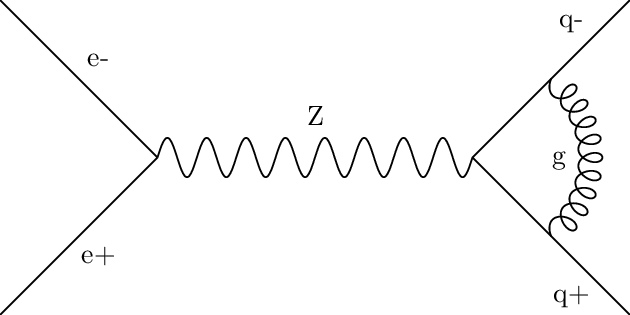

In [4]:
from pathlib import Path
from pyfeyn2.render.pyx.pyxrender import PyxRender

xml_string = Path("test.fml").read_text()
parser = XmlParser()
fml = parser.from_string(xml_string, FeynML)
print(fml)
wimg = PyxRender(fml.diagrams[0]).render()